# **Plotting Multiple Graphs in the Same Figure Using a Loop**

To plot multiple graphs in the same figure, we can use Matplotlib along with a loop to generate different functions or datasets dynamically. This approach is useful when dealing with multiple mathematical functions or datasets that follow a certain pattern.



### **Steps to Plot Multiple Graphs Using a Loop**
1. Import the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

2. Define the X-Values (Common for All Graphs)

* Use `numpy.linspace()` or `numpy.arange()` to create a range of $x$-values.
* Use a Loop to Compute Y-Values for Different Functions

3. Iterate over a set of functions or parameters.
* Calculate the corresponding $y$-values.

4. Plot Each Graph Within the Loop
* Use `plt.plot()` inside the loop to draw multiple graphs on the same figure.

5. Customize the Plot
* Add a legend, labels, and grid for better visualization.



### **Example 1: Plotting Multiple Power Functions in a Loop**

We plot $y=x^n$ for differnt values of $n$

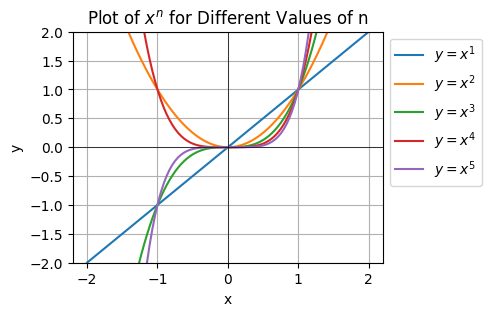

In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-2, 2, 100)

# Define different powers to plot
powers = [1, 2, 3, 4, 5]

# Loop through each power and plot the corresponding function
plt.figure(figsize=(4,3))
for n in powers:
    y = x ** n
    plt.plot(x, y, label=rf"$y = x^{n}$")

# Customize the plot

plt.ylim((-2,2))
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Plot of $x^n$ for Different Values of n")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc=0, bbox_to_anchor=(1,1))
plt.grid()

# Show the plot
plt.show()

# **Exercise: Plotting Multiple Trigonometric Functions**
A sine wave is a fundamental periodic function that appears in many areas of physics, engineering, and signal processing. The general equation of a sine wave is:
$$y(t)=A \sin(\omega t + \phi)$$
where:
* $A$ is the amplitude (peak value).
* $\omega$ is the *angular frequency*
* $t$ is the time or x-axis value.
* $\phi$ is the phase shift (determines horizontal shift).

Effect of Varying Frequency:
* A higher frequency makes the wave oscillate more rapidly.
* A lower frequency makes the wave oscillate more slowly.
* When frequency is zero, the function becomes a constant line.

### Exercise:
Write a Python program to plot sine waves with varying frequencies $\omega$.<br>
Assume the amplitude $A=1$ and the phase shift $\phi=0$.


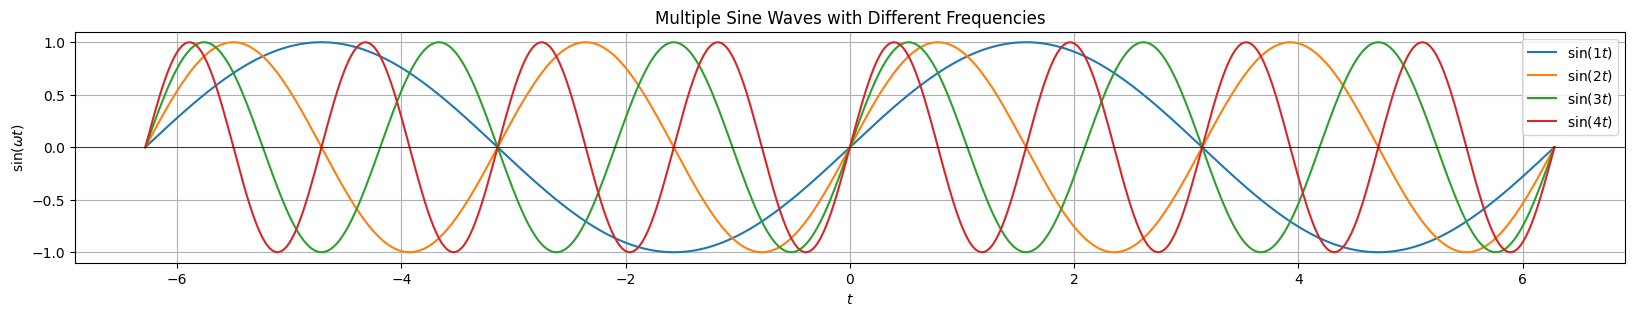

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt

# Define x values
t = np.linspace(-2*np.pi, 2 * np.pi, 500)

# Different frequencies for sine functions
frequencies = [1, 2, 3, 4]

# Loop to plot multiple sine waves
plt.figure(figsize=(20,3))
for w in frequencies:
    y = np.sin(w * t)
    plt.plot(t, y, label=rf"$\sin({w}t)$") # Latex rendering on formatted string

# Customize the plot
plt.xlabel(r"$t$")
plt.ylabel(r"$\sin(\omega t)$")
plt.title("Multiple Sine Waves with Different Frequencies")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

# Show the plot
plt.show()


# **Making a Movie of a Plot**
It is often useful to make animations or movies of plots, for instance if the
plot represents some physical phenomenon that changes with time, or if we
want to visualize the effect of changing parameters. Matplotlib has multiple
tools for creating such plots, and we will explore some of them here. To start
with a specific case, consider again the well-known Gaussian bell function:

$$f(x;m,s) = \frac{1}{\sqrt{2\pi} \cdot s} \exp{\left( - \frac{1}{2} \left(\frac{x-m}{s}\right)^2 \right)}$$

Where,
* $m$ is the location of the function's peak,
* $s$ is a measure of the width of the bell curve

We can plots this function for different values of $s$ as follows,

In [23]:
# import numpy as np
# import matplotlib.pyplot as plt

In [25]:
def f(x,m=0, s=1):
    return (1/(np.sqrt(2*np.pi)*s))*np.exp((-1/2)* ((x-m)/s)**2)

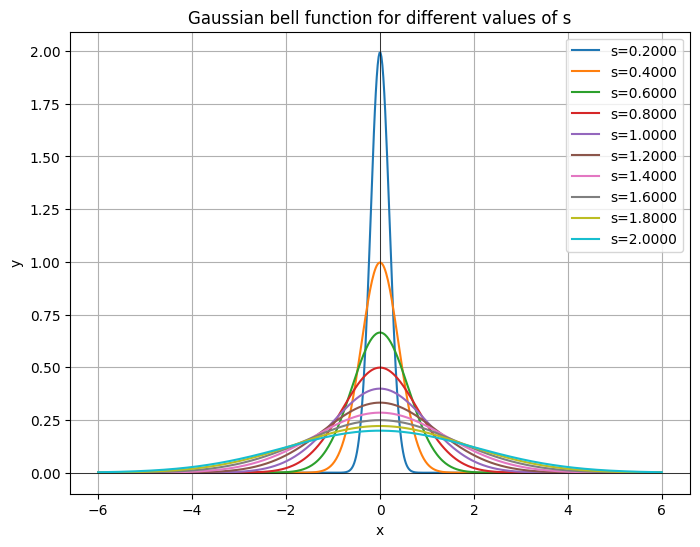

In [26]:
# Define x values
x = np.linspace(-6, 6, 600)

# Define different values of s to plot
s_values = np.linspace(0.2,2,10)

# Loop through each value of s and plot the corresponding function
plt.figure(figsize=(8, 6))
for s in s_values:
    y = f(x,0,s)
    plt.plot(x, y, label=f"s={s:.4f}")

# Customize the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian bell function for different values of s")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

# Show the plot
plt.show()

### As an alternative illustration of how the parameters change the function we can make a movie (animation) of how $f(x;m,s)$ changes shape as s goes from $0.2$ to $2$.

### **Movies are made from a large set of individual plots.**
* Movies of plots are created through the classical approach of cartoon movies (or, really, all movies): by creating a set of images and viewing them in rapid sequence.
* For our specific example, the typical approach is to write a for loop to step
through the $s$ values and either show the resulting plots directly or store
them in individual files for later processing.

* Regardless of the approach, it is important to always fix the axes when making animations of plots; otherwise, the $y$ axis always adapts to the peak of the function and the visual impression is completely wrong.

In Google Colab, you can create a movie from a plot using Matplotlib's FuncAnimation and save it as a video or GIF. Below are the steps:

1. **Install `ffmpeg` for saving videos on Google Colab**

  This is specific to Google Colab.

In [ ]:
# Install ffmpeg for saving videos
!apt-get install -y ffmpeg  # Run this only in Google Colab

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


2. **Use `matplotlib.animation.FuncAnimation` to generate frames.**

  FuncAnimation is a class in the matplotlib.animation module that allows you to create animations in Matplotlib by repeatedly updating a plot. It is useful for visualizing dynamic systems, time-dependent data, and real-time simulations.

  **Basic Syntax of FuncAnimation**
  ```
  FuncAnimation(fig, func, frames=None, init_func=None, interval=200, blit=False)
  ```
  * `fig`: The figure object where the animation will be drawn.
  * `func`: The function that updates the plot for each frame.
  * `frames`: The number of frames in the animation (can be an integer or an iterable).
  * `init_func`: A function that initializes the animation.
  * `interval`: Time delay (in milliseconds) between frames.
  * `blit`: A boolean value to improve performance by redrawing only changed parts.


3. **Display the animation in Colab using HTML.**

  The following code creates an animation by shifting a sine curve.


### **Example: Creating an Animated Sine Wave**



In [28]:
#import numpy as np
#import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [32]:
# Define axes and store the plot in a variable
x = np.linspace(0, 2*np.pi, 100)
lines = plt.plot(x, np.sin(x))

plt.title("Sine Wave")
plt.axis([0,2*np.pi,-1.1,1.1])

# Function to update animation frames
def update(phi):
    # Shift sine wave and update the y-values
    lines[0].set_ydata(np.sin(x + phi/10))
    return lines

# Create animation
ani = FuncAnimation(plt.gcf(), update, frames=100, interval=100)
'''
    # 'plt.gcf()' is used to get current figure
    # Update function is called for frame values of 0-99
    # These values are passed to the shift variable phi
'''

# Display the animation in Colab
HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

**You can save an animation as a video using FFmpeg:**

In [33]:
ani.save("sine_wave.mp4", writer="ffmpeg")

**Alternative: Save as GIF**

If you prefer a GIF format, you can save it as:



In [34]:
ani.save("sine_wave.gif", writer="pillow")

Then, display the GIF in Colab:



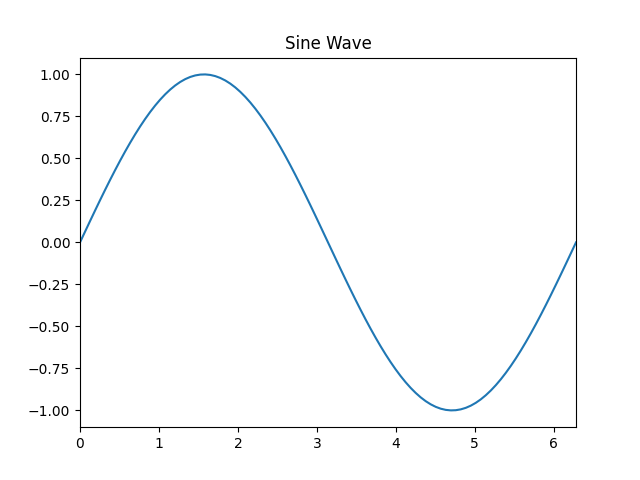

In [35]:
from IPython.display import Image
Image("sine_wave.gif")

# **Exercise: Animated Gaussian Bell Curve**

Write a Python program to create a movie of the curve for a varying values of $s \in [0.2,2]$.


In [36]:
# We have previously defined the function

def f(x,m=0, s=1):
    return (1/(np.sqrt(2*np.pi)*s))*np.exp((-1/2)* ((x-m)/s)**2)


In [38]:
# Define x values and store an initial plot
x = np.linspace(-6, 6, 600)
lines = plt.plot(x, f(x,0,0.2),label = f"s={s:.2f}")


# Customize the plot
plt.axis([-6,6,0,2.1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian bell function for different values of s")
legend = plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()

s_values = np.linspace(0.2,2,100)

def updateBell(s):
    y = f(x,0,s)
    lines[0].set_ydata(y)
    #lines[0].set_label(f"s={s:.2f}")
    legend.get_texts()[0].set_text(f"s={s:.2f}")
    return lines

aniBell = FuncAnimation(plt.gcf(), updateBell, frames = s_values, interval = 5)

HTML(aniBell.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

In [39]:
aniBell.save("BellMovie.gif", writer="pillow")

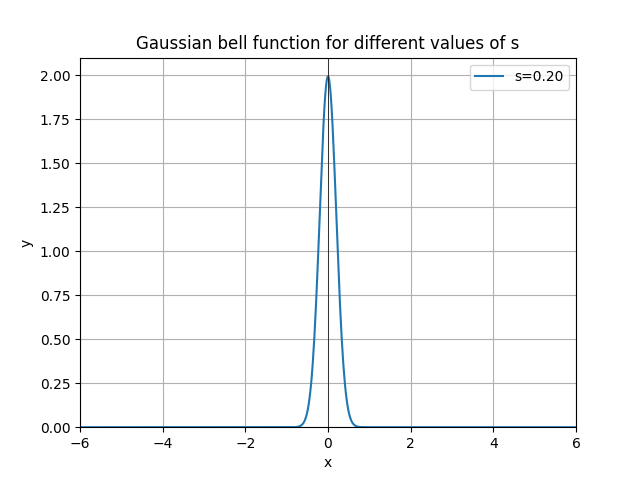

In [41]:
from IPython.display import Image
Image("BellMovie.gif")